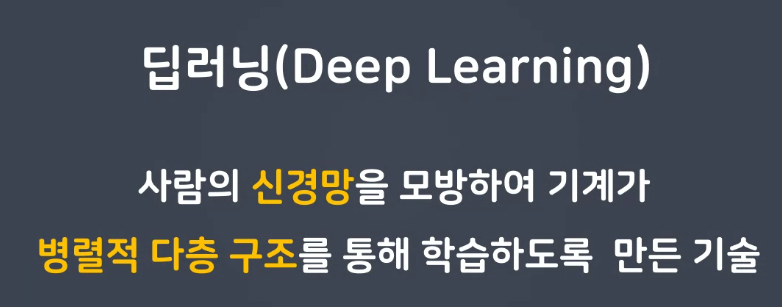

### 딥러닝
- 딥러닝 : 기계가 인간의 뉴런, 신경망을 모방하여 데이터를 학습 및 예측하는 기술
- 퍼셉트론 : 딥러닝 모댈을 구성하는 기본 단위 (퍼셉트론 = 선형모델 + 활성화 함수)
- 모델링 순서
    1. 신경망 구조 설계
        - 뼈대 생성(Sequential())
        - 입력층 (InputLayer(shape = (,))) -> 입력 특성의 형태를 지정
        - 중간층(은닉층) (Dense(units = ?, activation = ?)) -> 출력하고자 하는 데이터의 형태를 지정
    2. 학습 방법 및 평가 방법 설정 (compile(loss, optimizer, metrics))
    3. 모델 학습 (model.fit(X_train, y_train,validation_split =?, epochs=반복횟수))
    4. 모델 평가 (model.evaluate(X_test, y_test))

### 활성화 함수 activation -> 중간층, 출력층(활용도가 다름)
- 중간층 : 활성화 / 비활성화 (역치 : 활성화 하기 위해 필요한 최소 자극)
    - 초기 : stepfunction(계단 함수) -> sigmoid(시그모이드)
- 출력층 : 출력하고자 하는 데이터의 형태를 지정
    - 회귀 : linear(항등 함수 y = x) 선형 모델이 예측한 결과를 그대로 출력 -> default 값 별도로 작성하지 않아도 무방
    - 이진 분류 : sigmoid(시그모이드) 선형 모델이 예측한 연속형 데이터를 0과 1사이의 확률값으로 변경해주기 위함
    - 다중 분류 : softmax(소프트맥스) 클래스 개수 만큼의 결과값을 전체 합이 1인 결과로 변경

### 출력하고자 하는 데이터의 개수에 따라 units의 개수
- 회귀 : units = 1
- 이진 분류 : units = 1, 1개의 확률값 (인지 아닌지에 대한 판별)
- 다중 분류 : units = 클래스의 개수

### 학습방법 및 평가 방법 설정 -> compile
- loss(손실함수, 비용함수)
    - 회귀 : mse(평균제곱오차) 
    - 이진 분류 : binary_crossentropy
    - 다중 분류 : categorical_crossentropy -> 문제발생! -> 모델의 출력 결과와 정답 데이터의 형태가 달라 오류 발생 -> sparse_categorical_crossentropy
- optimizer(최적화 함수)
- metrics(평가지표)
    - 회귀 : mse(평균제곱오차)
    - 분류 : accuracy(정확도)


In [67]:
# !pip install google-colab-shell
# from google_colab_shell import getshell
# getshell()

#### 목표
- 공부시간에 따른 학생의 성적 예측하는 모델 만들기
- sklearn을 이용한 모델링과 keras를 이용한 모델링

#### 데이터로딩

In [68]:
%cd "C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning"

C:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML\DeepLearning


C:\Users\chxss\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("./data/student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |

#### 문제와 답 추출
- 공부시간 -> X
- 최종성적 -> Y

In [71]:
X = data['studytime']
y = data['G3']

In [72]:
X.shape, y.shape

((395,), (395,))

#### 선형회귀 모델링
- 훈련/평가 데이터 분리
- 모델학습 및 평가

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
# 훈련/평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # 테스트20% 훈련 80%
                                                    random_state=829)

In [75]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(316,) (316,)
(79,) (79,)


In [76]:
# X_train.values.reshape(행, 열)
X_train.values.reshape(-1,1)

array([[2],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [2],
       [3],
       [4],
       [4],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [4],
       [2],
       [1],
       [3],
       [2],
       [1],
       [2],
       [1],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [1],
       [1],
       [3],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
    

In [77]:
# 모델 생성 -> 모델 학습 -> 모델 예측 -> 모델 평가
lr_model = LinearRegression()
# 모델학습 -> 모델명.fit(학습용 문제, 학습용 정답)
# 머신러닝 학습시 문제데이터는 반드시 2차원 (.reshape) 
lr_model.fit(X_train.values.reshape(-1, 1), y_train)
# 모델 예측 -> 모델명.predict(테스트용문제)
pre = lr_model.predict(X_test.values.reshape(-1, 1))
# 선형모델 평가 -> mean_squared_error(실제값, 예측값)
score = mean_squared_error(y_test, pre)
print('평균제곱오차 : ',score)

평균제곱오차 :  20.61156468545777


In [78]:
20**0.5

4.47213595499958

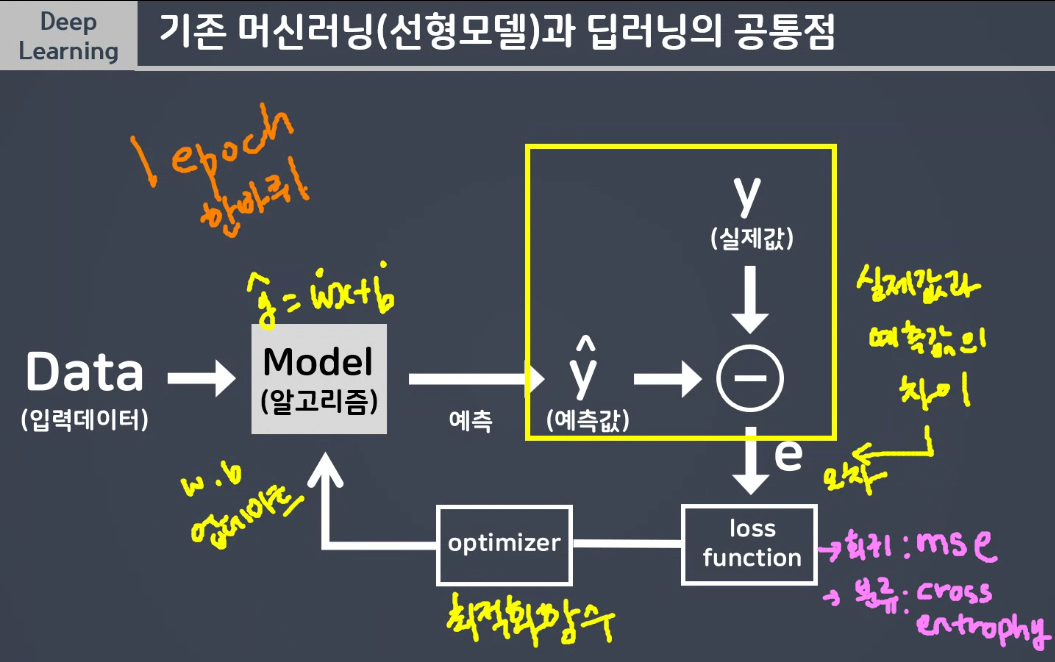

#### Keras를 이용한 딥러닝 모델링

In [79]:
# !pip install tensorflow

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [81]:
# 모델 생성(모델 설계)
# 뼈대 생성
deep_model = Sequential()
# 입력층
# 입력특성의 개수 설정 -> studytime
deep_model.add(InputLayer(shape=(1,)))
# 중간층(은닉층) -> 학습의 능력을 결정
# units -> 퍼셉트론의 개수를 의미
# 퍼셉트론 = 선형모델 + 활성화 함수
deep_model.add(Dense(units=8, activation='sigmoid'))
deep_model.add(Dense(units=8, activation='sigmoid'))
# 출력층 -> 출력되는 데이터의 형태 설계 -> 예측하고자하는 데이터의 형태 지정
# 회귀 (연속형)
deep_model.add(Dense(units=1))

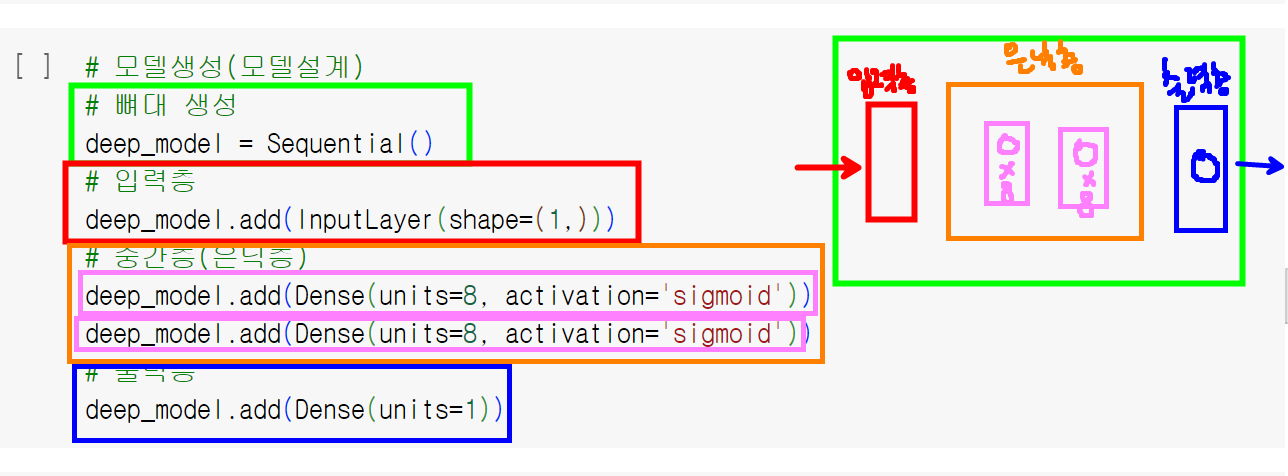

In [82]:
# 모델 학습
# 손실 함수, 최적화 함수 => 커스터마이징
deep_model.compile(loss='mse',
                    optimizer='adam')
deep_model.fit(X_train,y_train,
                validation_split=0.2, # 훈련데이터에서 (316개) 20%를 검증용으로 활용
                epochs=20) # 모델의 가중치를 업데이트하는 반복 횟수


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 110.5705 - val_loss: 109.0328
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.9840 - val_loss: 107.6021
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.6381 - val_loss: 106.1859
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.7988 - val_loss: 104.7802
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.6504 - val_loss: 103.3847
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.2785 - val_loss: 102.0032
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.1644 - val_loss: 100.6355
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.8132 - val_loss: 99.2874
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.2941 - val_loss: 97.9435
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.6975 - val_loss: 96.6150
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94.7716 - val_loss: 95.2921
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.3

In [83]:
# 모델 예측 및 평가
deep_model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.6279 


81.02777099609375

In [84]:
X_train

241    2
196    1
50     2
318    3
200    2
      ..
298    4
383    1
262    3
288    3
367    1
Name: studytime, Length: 316, dtype: int64

In [85]:
# 딥러닝 신경망 설계
# 입력특성 -> 4개 설정
X = data[['studytime', 'traveltime', 'famrel','freetime']]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 신경망 설계
# 1. 뼈대 생성
deep_model_2 = Sequential()
# 2. 입력층 -> 입력 특성의 개수를 설정
deep_model_2.add(InputLayer(shape=(4,)))
# 3. 중간층, 은닉층 설계 -> 3층 (8, 16, 8)
deep_model_2.add(Dense(units=8, activation='sigmoid'))
deep_model_2.add(Dense(units=16, activation='sigmoid'))
deep_model_2.add(Dense(units=8, activation='sigmoid'))
# 4. 출력층 -> 출력하고자 하는 데이터의 형태 지정(회귀)
deep_model_2.add(Dense(units=1))
# 모델 학습 방법 및 평가 방법 설계
deep_model_2.compile(loss='mse',
                    optimizer='adam')
deep_model_2.fit(X_train, y_train,
                validation_split=0.2,  # 훈련데이터에서 20%를 검증용으로 활용
                epochs=20)  # 모델의 가중치를 업데이트하는 반복 횟수
# 모델 평가
deep_model_2.evaluate(X_test, y_test)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 106.4002 - val_loss: 114.2410
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.4123 - val_loss: 111.7207
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.0153 - val_loss: 109.2496
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.6317 - val_loss: 106.8164
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108.3325 - val_loss: 104.4255
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105.5359 - val_loss: 102.0849
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.2143 - val_loss: 99.7558
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.6894 - val_loss: 97.4669
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.9246 - val_loss: 95.1984
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94.4756 - val_loss: 92.9801
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.0931 - val_loss: 90.7951
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92.

81.43177795410156

In [86]:
# 딥러닝 신경망 설계
# 입력특성 -> 4개 설정
X2 = data[['studytime', 'traveltime', 'health','freetime']] # 2차원이니 []추가
X2
y = data['G3']
# from sklearn.model_selection import train_test_split 데이터 나누는 임포트
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=93)

In [87]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 4) (276,)
(119, 4) (119,)


In [88]:
# 신경망 설계
# 1. 뼈대 생성
model = Sequential()
# 2. 입력층 -> 입력 특성의 개수를 설정
model.add(InputLayer(shape=(4,))) # 입력특성이 4개 입력됨을 설정
# 3. 중간층, 은닉층 설계 -> 3층 (8, 16, 8)
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 4. 출력층 -> 출력하고자 하는 데이터의 형태 지정(회귀) -> 1개의 연속형 데이터
model.add(Dense(units=1))
# 모델 학습 방법 및 평가 방법 설계
model.compile(loss='mse', # 모델의 학습을 위해 잘목된 정도를 측정하는 알고리즘
                optimizer='adam', # 모델의 w,b 값을 최적화하는 알고리즘
                metrics=['mse']) # default metrics=['mse'] / 분류는 accuracy 
# 모델 학습
model.fit(X_train, y_train,
            validation_split=0.2,  # 훈련데이터에서 20%를 검증용으로 활용
            epochs=20)  # 모델의 가중치를 업데이트하는 반복 횟수
# 모델 평가
model.evaluate(X_test, y_test)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 147.1856 - mse: 147.1856 - val_loss: 152.7866 - val_mse: 152.7866
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156.5918 - mse: 156.5918 - val_loss: 150.8910 - val_mse: 150.8910
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.4463 - mse: 144.4463 - val_loss: 149.0525 - val_mse: 149.0525
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.1303 - mse: 144.1303 - val_loss: 147.2509 - val_mse: 147.2509
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139.6747 - mse: 139.6747 - val_loss: 145.4859 - val_mse: 145.4859
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137.7759 - mse: 137.7759 - val_loss: 143.7557 - val_mse: 143.7557
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 138.9826 - mse: 138.9826 - val_loss: 142.0584 - val_mse: 142.0584
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137.3526 - mse: 137.3526 - val_loss: 140.4005 - val_mse: 140.4005
Epoch 9/20
7/7 ━━━━━━━━

[110.02381134033203, 110.02381134033203]